In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import os

#Importing the weather data and the occupants per hour
weather_log = pd.read_csv('../input/weather-log/weather_log.csv')
occupant_log = pd.read_csv('../input/occupant-log/occupant_log.csv')

In [2]:
#Dropping the placeholder columns created by each dataset
weather_log = weather_log.drop(columns = ['time', 'Unnamed: 0'])
occupant_log = occupant_log.drop(columns = {'Unnamed: 0'})

#Ensuring both 'realtime' columns are a datetime type, as that's what we're merging these two sets on
weather_log['realtime'] =  pd.to_datetime(weather_log['realtime'])
occupant_log['realtime'] =  pd.to_datetime(occupant_log['realtime'])

In [3]:
weather_log.head()

,realtime,summary,icon,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility
0,2017-01-01 08:00:00,Mostly Cloudy,partly-cloudy-night,0.00,0.00,0,1.14,1.14,-0.89,0.86,1005.95,1.17,NaN,318,0.57,0,16.089
1,2017-01-01 09:00:00,Mostly Cloudy,partly-cloudy-night,0.00,0.00,0,1.01,1.01,-1.16,0.85,1005.90,1.05,NaN,318,0.71,0,16.089
2,2017-01-01 10:00:00,Overcast,cloudy,0.00,0.00,0,1.31,-0.75,-0.83,0.86,1005.97,1.85,NaN,349,1.00,0,15.942
3,2017-01-01 11:00:00,Overcast,cloudy,0.00,0.00,0,1.40,-0.75,-0.45,0.87,1006.21,1.94,NaN,321,1.00,0,10.407
4,2017-01-01 12:00:00,Overcast,cloudy,0.02,0.18,sleet,1.43,-0.24,-0.06,0.90,1006.29,1.58,NaN,340,1.00,0,16.089


In [4]:
occupant_log.head()

,Occupants,realtime,Date,Time,Day,Weekday,Month
0,0,2017-01-01 08:00:00,2017-01-01,8,1,6,1
1,0,2017-01-01 09:00:00,2017-01-01,9,1,6,1
2,0,2017-01-01 10:00:00,2017-01-01,10,1,6,1
3,2,2017-01-01 11:00:00,2017-01-01,11,1,6,1
4,2,2017-01-01 12:00:00,2017-01-01,12,1,6,1


In [6]:
#Adding a Season column to increase accuracy
occupant_log.loc[(occupant_log['Month'] > 0) & (occupant_log['Month']<= 2), 'Season'] = 1
occupant_log.loc[(occupant_log['Month'] >= 3) & (occupant_log['Month']<= 5), 'Season'] = 2
occupant_log.loc[(occupant_log['Month'] >= 6) & (occupant_log['Month']<= 8), 'Season'] = 3
occupant_log.loc[(occupant_log['Month'] >= 9) & (occupant_log['Month']<= 11), 'Season'] = 4
occupant_log.loc[occupant_log['Month'] == 12, 'Season'] = 1

In [7]:
#Adding a column determing if it's the weekend or not to increase accuracy
occupant_log['Is Weekday'] = [0 if (x == 0 | x == 6) else 1 for x in occupant_log['Weekday']]

In [8]:
#Merging both datasets together on the timestamp or 'realtime'
df_combined = pd.merge(weather_log, occupant_log, on='realtime', how='left')
df_combined.set_index('realtime')

,summary,icon,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,...,uvIndex,visibility,Occupants,Date,Time,Day,Weekday,Month,Season,Is Weekday
realtime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,Mostly Cloudy,partly-cloudy-night,0.00,0.00,0,1.14,1.14,-0.89,0.86,1005.95,...,0,16.089,0,2017-01-01,8,1,6,1,1.0,0
2017-01-01 09:00:00,Mostly Cloudy,partly-cloudy-night,0.00,0.00,0,1.01,1.01,-1.16,0.85,1005.90,...,0,16.089,0,2017-01-01,9,1,6,1,1.0,0
2017-01-01 10:00:00,Overcast,cloudy,0.00,0.00,0,1.31,-0.75,-0.83,0.86,1005.97,...,0,15.942,0,2017-01-01,10,1,6,1,1.0,0
2017-01-01 11:00:00,Overcast,cloudy,0.00,0.00,0,1.40,-0.75,-0.45,0.87,1006.21,...,0,10.407,2,2017-01-01,11,1,6,1,1.0,0
2017-01-01 12:00:00,Overcast,cloudy,0.02,0.18,sleet,1.43,-0.24,-0.06,0.90,1006.29,...,0,16.089,2,2017-01-01,12,1,6,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-10 02:00:00,Partly Cloudy,partly-cloudy-day,0.00,0.00,0,16.41,16.41,8.47,0.59,1026.95,...,1,16.093,0,2019-06-10,2,161,0,6,3.0,1
2019-06-10 03:00:00,Partly Cloudy,partly-cloudy-day,0.00,0.00,0,14.81,14.81,7.99,0.64,1026.90,...,0,16.093,0,2019-06-10,3,161,0,6,3.0,1
2019-06-10 04:00:00,Partly Cloudy,partly-cloudy-day,0.00,0.00,0,13.72,13.72,7.82,0.68,1026.76,...,0,15.810,0,2019-06-10,4,161,0,6,3.0,1


In [9]:
#df_combined = df_combined.drop(columns = {'windGust'})

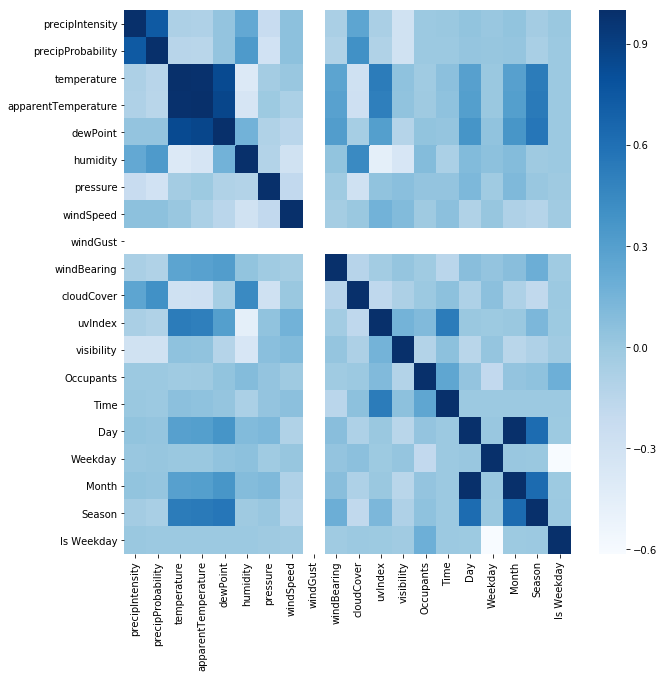

In [10]:
#Plotting a heatmap to see correlations with Occupants
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_combined.corr(), cmap='Blues')

In [13]:
#Setting up targets, features, and splitting up the data
targets = df_combined['Occupants']
features = df_combined.drop(columns = {'Occupants', 'realtime', 'precipType', 'icon', 'summary', 'Date', 'Day','dewPoint', 'pressure', 'windBearing', 'windGust'})
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [14]:
#Determining prediction score with Random Forest
forest = RandomForestRegressor(n_estimators=200,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

57.61288474040312

Now 57.6% isn't the greatest score. How can this be increased? 

I need to add new features and drop features that can cause some uncertainty.

I'll be updating this notebook over time to achieve a better score. Once done, I want to create a webapp that can use this for people to see in real time.